## How does pytorch matrix multiplication wall clock time compare with different batch sizes?

Batch size: 2, Average time: 0.000046 seconds
Batch size: 4, Average time: 0.000054 seconds
Batch size: 8, Average time: 0.000060 seconds
Batch size: 16, Average time: 0.000060 seconds
Batch size: 32, Average time: 0.000053 seconds
Batch size: 64, Average time: 0.000040 seconds
Batch size: 128, Average time: 0.000062 seconds
Batch size: 256, Average time: 0.000099 seconds
Batch size: 512, Average time: 0.000169 seconds
Batch size: 1024, Average time: 0.000310 seconds


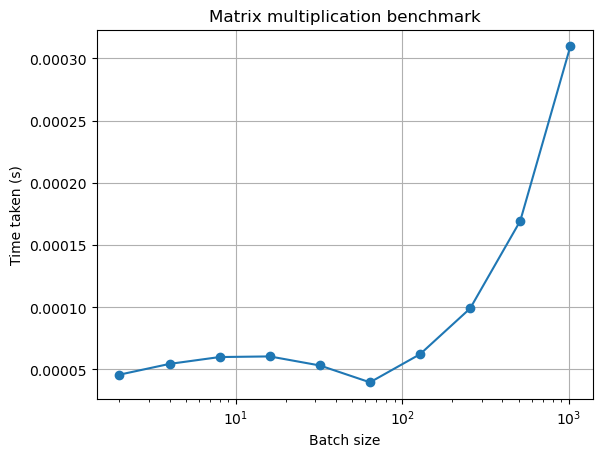

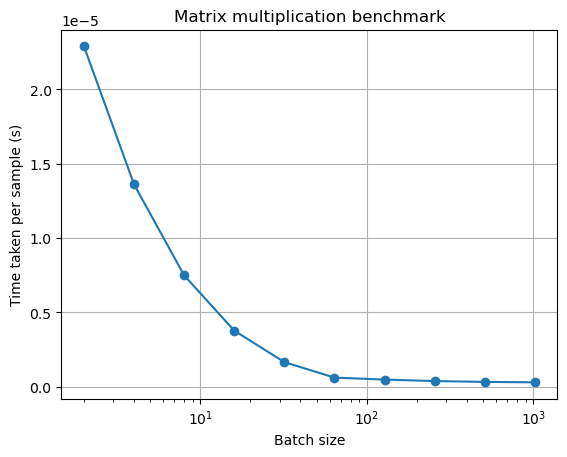

In [5]:
import torch
import time
from matplotlib import pyplot as plt

def benchmark_matmul(batch_sizes, mat_size):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    results = []

    for batch_size in batch_sizes:
        # a = torch.randn(batch_size, mat_size, mat_size, device=device)
        # b = torch.randn(batch_size, mat_size, mat_size, device=device)
        a = torch.randn(batch_size, mat_size, device=device)
        b = torch.randn(mat_size, mat_size, device=device)
        
        # Warm-up run
        torch.matmul(a, b)
        
        # Timed runs
        start_time = time.time()
        for _ in range(10):
            # torch.matmul(a, b)
            a@b
            # result=a+b
        torch.cuda.synchronize()  # Ensure all GPU computations are done
        end_time = time.time()
        
        avg_time = (end_time - start_time) / 10
        results.append((batch_size, avg_time))
        
    return results

# Example usage
batch_sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
mat_size = 1000  # Size of each matrix (1000x1000)

results = benchmark_matmul(batch_sizes, mat_size)

for batch_size, avg_time in results:
    print(f"Batch size: {batch_size}, Average time: {avg_time:.6f} seconds")

time_taken = [avg_time for _, avg_time in results]
efficiency = [avg_time/batch_size for batch_size, avg_time in results]
batch_size = [batch_size for batch_size, avg_time in results]

plt.figure()
plt.plot(*zip(*results), marker='o')
plt.xlabel("Batch size")
plt.ylabel("Time taken (s)")
plt.title("Matrix multiplication benchmark")
plt.grid()
plt.xscale("log")
# plt.yscale("log")
plt.show()

plt.figure()
plt.plot(batch_size, efficiency, marker='o')
plt.xlabel("Batch size")
plt.ylabel("Time taken per sample (s)")
plt.title("Matrix multiplication benchmark")
plt.grid()
plt.xscale("log")
# plt.yscale("log")
plt.show()